In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import numpy as np
import pickle
import cloudpickle
import json
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

from enterprise.signals import signal_base
from enterprise.signals import gp_signals
from enterprise.pulsar import Pulsar
from enterprise.signals import parameter
from enterprise.signals import gp_priors


from enterprise_extensions.chromatic.solar_wind import solar_wind_block
from enterprise_extensions.chromatic import dm_exponential_dip
from enterprise_extensions import model_utils, blocks
from enterprise_extensions import model_orfs
from enterprise_extensions.frequentist import optimal_statistic as opt_stat
from enterprise.signals import selections

import h5py
import la_forge.core as co

In [2]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/ppta/psrs_ppta_dr3.pkl','rb') as fin:
    ppta_psrs1=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/ng15_nodmx.pkl','rb') as fin:
    ng_psrs=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/epta/dr2new/psrs_epta_dr2new.pkl','rb') as fin:
    epta_psrs=pickle.load(fin)

In [3]:
for p in ppta_psrs1:
    p.name=p.name+'_ppta'
ppta_psrs=[]
for p in ppta_psrs1: 
    if p.name == 'J2241-5236_ppta':
        pass
    elif p.name=='J1824-2452A_ppta':
        pass
    else:
        ppta_psrs.append(p)
for p in ng_psrs:
    p.name=p.name+'_ng'
for p in epta_psrs:
    p.name=p.name+'_epta'

In [4]:
for p in ppta_psrs:
    print(p.name)

J0030+0451_ppta
J0125-2327_ppta
J0437-4715_ppta
J0613-0200_ppta
J0614-3329_ppta
J0711-6830_ppta
J1017-7156_ppta
J1022+1001_ppta
J1024-0719_ppta
J1045-4509_ppta
J1125-6014_ppta
J1446-4701_ppta
J1545-4550_ppta
J1600-3053_ppta
J1603-7202_ppta
J1643-1224_ppta
J1713+0747_ppta
J1730-2304_ppta
J1744-1134_ppta
J1832-0836_ppta
J1857+0943_ppta
J1909-3744_ppta
J1933-6211_ppta
J1939+2134_ppta
J2124-3358_ppta
J2129-5721_ppta
J2145-0750_ppta


In [5]:
psrs=[]
psrs.extend(ppta_psrs)
psrs.extend(ng_psrs)
psrs.extend(epta_psrs)

In [6]:
model_utils.get_tspan(psrs)

596533603.0710592

In [7]:
min_toas=[]
max_toas=[]
for i in psrs:
    min_toas.append(np.min(i.toas))
    max_toas.append(np.max(i.toas))
np.max(max_toas)-np.min(min_toas)

596533603.0710592

In [8]:
# #FOR THE NEXT TWO CELLS IT IS IMPORTANT THAT THE PULSARS ARE KEPT IN THE EXACT SAME ORDER
# with open('/Users/kalistaw/Desktop/OS_2023_data/ppta_models_tspan_ppta_fx_gamma_one_curn.pkl','rb') as fin:
#     ppta_models = cloudpickle.load(fin)
# with open('/Users/kalistaw/Desktop/OS_2023_data/ng_models_tspan_ppta_fx_gamma_one_curn.pkl','rb') as fin:
#     ng_models = cloudpickle.load(fin)
# with open('/Users/kalistaw/Desktop/OS_2023_data/epta_models_tspan_ppta_fx_gamma_one_curn.pkl','rb') as fin:
#     epta_models = cloudpickle.load(fin)

In [9]:
# models=[]
# models.extend(ppta_models)
# models.extend(ng_models)
# models.extend(epta_models)

In [10]:
noisefile_ppta = '/Users/kalistaw/Desktop/OS_2023_data/ppta_noise_params.pkl'
noisefile_ng = '/Users/kalistaw/Desktop/OS_2023_data/ng_noise_params.pkl'
noisefile_epta = '/Users/kalistaw/Desktop/OS_2023_data/epta_noise_params.pkl'
with open(noisefile_ppta,'rb') as fin:
    ppta_noise=pickle.load(fin)
with open(noisefile_ng,'rb') as fin:
    ng_noise=pickle.load(fin)
with open(noisefile_epta,'rb') as fin:
    epta_noise=pickle.load(fin)

In [11]:
noise = {}
noise.update(ppta_noise)
noise.update(ng_noise)
noise.update(epta_noise)

In [12]:
# %%time

# # We set up the PTA object using the signal we defined above and the pulsars
# pta = signal_base.PTA(models)

# # We need to set the white noise parameters to the values in the noise dictionary
# pta.set_default_params(noise)

In [13]:
noise

{'J0030+0451_ppta_UWL_sbA_efac': 1.0395205071179219,
 'J0030+0451_ppta_UWL_sbA_log10_t2equad': -5.961436609187894,
 'J0030+0451_ppta_UWL_sbB_efac': 1.08572856933657,
 'J0030+0451_ppta_UWL_sbB_log10_t2equad': -7.655549541251448,
 'J0030+0451_ppta_UWL_sbC_efac': 1.0981140220620083,
 'J0030+0451_ppta_UWL_sbC_log10_t2equad': -7.412909501034909,
 'J0030+0451_ppta_UWL_sbD_efac': 1.120312377175945,
 'J0030+0451_ppta_UWL_sbD_log10_t2equad': -7.189635297173146,
 'J0030+0451_ppta_UWL_sbE_efac': 0.9616005092258848,
 'J0030+0451_ppta_UWL_sbE_log10_t2equad': -6.059659477735372,
 'J0030+0451_ppta_UWL_sbF_efac': 0.960249804491331,
 'J0030+0451_ppta_UWL_sbF_log10_t2equad': -7.465505711251239,
 'J0030+0451_ppta_UWL_sbG_efac': 0.8012069830678203,
 'J0030+0451_ppta_UWL_sbG_log10_t2equad': -5.4246762790085725,
 'J0030+0451_ppta_UWL_sbH_efac': 0.8210346267788027,
 'J0030+0451_ppta_UWL_sbH_log10_t2equad': -8.285995953881807,
 'J0030+0451_ppta_dm_gp_gamma': 4.679213653756971,
 'J0030+0451_ppta_dm_gp_log10_A'

In [14]:
%%time
# (Note: It may take a few minutes to run this cell and may require at least ~4GB RAM)
# Initialize the optimal statistic object
# You can give it a list of pulsars and the noise dictionary, and it will create the pta object for you
# Alternatively, you can make the pta object yourself and give it to the OptimalStatistic object as an argument

# find the maximum time span to set GW frequency sampling
Tspan = 596533603.0710592 #PPTA TSpan

#model_utils.get_tspan(psrs)

#596533603.0710592 #PPTA TSpan

#326044597.6654711 #EPTA TSPAN
#model_utils.get_tspan(psrs)

tm = gp_signals.TimingModel(use_svd=True)


rn = blocks.red_noise_block(components=30, Tspan=Tspan)

dmgp = blocks.dm_noise_block(components=100, Tspan=Tspan)

crn = blocks.common_red_noise_block(
    components=10,
    orf='spline_orf',
    Tspan=Tspan,
    gamma_val=13/3,
    name="gw"
)

s_crn = tm  + rn + dmgp + crn

models = []
for p in psrs:
    s = s_crn
    if '_ng' in p.name:
        s+=  blocks.white_noise_block(vary=False, inc_ecorr=True, select='backend')
        s += solar_wind_block(include_swgp=False)
    elif '_epta' in p.name:
        s += blocks.white_noise_block(vary=False, inc_ecorr=False, select='backend',tnequad=True)
    else:
        s+=  blocks.white_noise_block(vary=False, inc_ecorr=False, select='backend')
        
    if p.name == "J1713+0747_ng":
        s += dm_exponential_dip(54700, 54800, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_0")
        s += dm_exponential_dip(57500, 57520, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_1")
    if p.name == "J1713+0747_epta":
        s += dm_exponential_dip(54700, 54800, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_1")
        s += dm_exponential_dip(57500, 57520, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_2")
    if p.name == "J1713+0747_ppta":
        s += dm_exponential_dip(54700, 54800, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_1")
        s += dm_exponential_dip(57500, 57520, 
                                idx=parameter.Uniform(1, 5),
                                name="dmexp_2")
    models.append(s(p))
pta = signal_base.PTA(models)
pta.set_default_params(noise)

CPU times: user 14.9 s, sys: 908 ms, total: 15.8 s
Wall time: 15.8 s


In [18]:
print(pta.summary())

enterprise v3.3.2,  Python v3.9.16

Signal Name                              Signal Class                   no. Parameters      
J0030+0451_ppta_linear_timing_model_svd  TimingModel                    0                   

params:
__________________________________________________________________________________________
J0030+0451_ppta_red_noise                FourierBasisGP                 2                   

params:
J0030+0451_ppta_red_noise_log10_A:Uniform(pmin=-20, pmax=-11)                             
J0030+0451_ppta_red_noise_gamma:Uniform(pmin=0, pmax=7)                                   
__________________________________________________________________________________________
J0030+0451_ppta_dm_gp                    BasisGP                        2                   

params:
J0030+0451_ppta_dm_gp_log10_A:Uniform(pmin=-20, pmax=-11)                                 
J0030+0451_ppta_dm_gp_gamma:Uniform(pmin=0, pmax=7)                                       
___________________

In [17]:
import cloudpickle
with open('/Users/kalistaw/Desktop/OS_2023_data/three_models_tspan_ppta_fx_gamma_one_curn_orf_spline_elif.pkl','wb') as fout:
    cloudpickle.dump(pta,fout)

In [17]:
ppta_array=np.load("/Users/kalistaw/Desktop/OS_2023_data/combined_ppta_chain_fx_gamma.npy")
ng_array=np.load("/Users/kalistaw/Desktop/OS_2023_data/combined_ng_chain_fx_gamma.npy") #(Nsamples, Npa
epta_array=np.load('/Users/kalistaw/Desktop/OS_2023_data/combined_epta_chain_fx_gamma.npy')

In [18]:
print(ppta_array.shape)
print(ng_array.shape)
print(epta_array.shape)

(1000, 121)
(1000, 286)
(1000, 113)


In [19]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/ppta_param_names_comined_fx_gamma.pkl', 'rb') as fp:
    ppta_param_names = pickle.load(fp)
with open ('/Users/kalistaw/Desktop/OS_2023_data/ng_param_names_comined_fx_gamma.pkl', 'rb') as fp:
    ng_param_names = pickle.load(fp)
with open ('/Users/kalistaw/Desktop/OS_2023_data/epta_param_names_comined_fx_gamma_unq_indx.pkl', 'rb') as fp:
    epta_param_names = pickle.load(fp)

In [24]:
ppta_dict_list=[]
for ii in range(ppta_array.shape[0]):
    param =(dict(zip(ppta_param_names,ppta_array[ii,:])))
    ppta_dict_list.append(param)

In [25]:
ng_dict_list=[]
for ii in range(ng_array.shape[0]):
    param =(dict(zip(ng_param_names,ng_array[ii,:])))
    ng_dict_list.append(param)

In [26]:
epta_dict_list=[]
for ii in range(epta_array.shape[0]):
    param =(dict(zip(epta_param_names,epta_array[ii,:])))
    epta_dict_list.append(param)

In [27]:
epta_gw=[]
for dicti in epta_dict_list:
    for key,val in dicti.items():
        if 'gw' in key:
            epta_gw.append(val)
ng_gw=[]
for dicti in ng_dict_list:
    for key,val in dicti.items():
        if 'gw' in key:
            ng_gw.append(val)
ppta_gw=[]
for dicti in ppta_dict_list:
    for key,val in dicti.items():
        if 'gw' in key:
            ppta_gw.append(val)

In [28]:
gw_A_avg=[]
ngw = len(ng_gw)
for i in range(ngw):
    gw=(epta_gw[i]+ng_gw[i]+ppta_gw[i])/3
    gw_A_avg.append(gw)

In [29]:
gw_A_avg

[-14.646450108780712,
 -14.615571171045653,
 -14.675117398039527,
 -14.609481571110152,
 -14.602342510081195,
 -14.685940428098446,
 -14.66868790045667,
 -14.668851891219811,
 -14.622249899237971,
 -14.62398421446592,
 -14.633210052403735,
 -14.64230083417209,
 -14.617469920349933,
 -14.650860976797091,
 -14.668919165706699,
 -14.601940376564349,
 -14.625701519290219,
 -14.639556349018216,
 -14.71897486518702,
 -14.65949646608531,
 -14.790318082808284,
 -14.653917499379732,
 -14.712225909503067,
 -14.653036657730212,
 -14.628538278861228,
 -14.731486205169382,
 -14.720926726810745,
 -14.592774991646742,
 -14.662667835480546,
 -14.652789488297264,
 -14.698245251965481,
 -14.660788892789087,
 -14.639869947741538,
 -14.70270848242447,
 -14.595037647824059,
 -14.696371701951778,
 -14.622180327215617,
 -14.647237821206645,
 -14.606488168699693,
 -14.635857001325185,
 -14.660896928771608,
 -14.669439493535918,
 -14.67296641343018,
 -14.605248908659588,
 -14.65738124028315,
 -14.6225281636684

In [30]:
print(ppta_param_names[116],ng_param_names[280],epta_param_names[108])

gw_log10_A gw_log10_A gw_log10_A


In [31]:
for ii in range(ppta_array.shape[0]):
    ppta_array[ii,116]=gw_A_avg[ii]
    ng_array[ii,280]=gw_A_avg[ii]
    epta_array[ii,108]=gw_A_avg[ii]

In [32]:
print(ppta_array[1,116],ng_array[1,280],epta_array[1,108])

-14.615571171045653 -14.615571171045653 -14.615571171045653


In [33]:
dict_list=[]
for ii in range(ppta_array.shape[0]):
    param =(dict(zip(ppta_param_names,ppta_array[ii,:])))
    param.update(dict(zip(ng_param_names,ng_array[ii,:])))
    param.update(dict(zip(epta_param_names,epta_array[ii,:])))
    dict_list.append(param)

In [34]:
for dicti in dict_list:
    for key,val in dicti.items():
        if 'gw' in key:
            print(val)

-14.646450108780712
-14.615571171045653
-14.675117398039527
-14.609481571110152
-14.602342510081195
-14.685940428098446
-14.66868790045667
-14.668851891219811
-14.622249899237971
-14.62398421446592
-14.633210052403735
-14.64230083417209
-14.617469920349933
-14.650860976797091
-14.668919165706699
-14.601940376564349
-14.625701519290219
-14.639556349018216
-14.71897486518702
-14.65949646608531
-14.790318082808284
-14.653917499379732
-14.712225909503067
-14.653036657730212
-14.628538278861228
-14.731486205169382
-14.720926726810745
-14.592774991646742
-14.662667835480546
-14.652789488297264
-14.698245251965481
-14.660788892789087
-14.639869947741538
-14.70270848242447
-14.595037647824059
-14.696371701951778
-14.622180327215617
-14.647237821206645
-14.606488168699693
-14.635857001325185
-14.660896928771608
-14.669439493535918
-14.67296641343018
-14.605248908659588
-14.65738124028315
-14.622528163668482
-14.542134250962683
-14.631108837995754
-14.662790429943742
-14.69790162247302
-14.65670

In [35]:
print(len(ppta_param_names))
print(len(ng_param_names))
print(len(epta_param_names))

121
286
113


In [36]:
for ky in ppta_param_names:
    if ky not in pta.param_names:
        print(ky)

lnpost_ppta
lnlike_ppta
chain_ppta_accept
pt_ppta_chain_accept


In [37]:
for ky in ng_param_names:
    if ky not in pta.param_names:
        print(ky)

lnpost_ng
lnlike_ng
chain_ng_accept
pt_ng_chain_accept


In [38]:
for ky in epta_param_names:
    if ky not in pta.param_names:
        print(ky)

lnpost_epta
lnlike_epta
chain_epta_accept
pt_epta_chain_accept


In [35]:
ostat = opt_stat.OptimalStatistic(psrs, pta=pta, orf='hd')

In [36]:
len(ostat.psrlocs)

120

In [37]:
len(psrs)

120

In [38]:
print(len(ppta_param_names)+len(ng_param_names)+len(epta_param_names))

520


In [39]:
import json
with open('/Users/kalistaw/Desktop/OS_2023_data/combined_three_pta_chain_fx_gamma_bf.pkl', 'w') as fout:
    json.dump(dict_list, fout)

In [40]:
ahat= []
snr = []
rho = []
sig=[]
for ii in range(ppta_array.shape[0]):
    param =(dict(zip(ppta_param_names,ppta_array[ii,:])))
    param.update(dict(zip(ng_param_names,ng_array[ii,:])))
    param.update(dict(zip(epta_param_names,epta_array[ii,:])))
    xi, Rho, Sig, Ahat, Ahat_err = ostat.compute_os(params=param) #HD
    print(Ahat)
    ahat.append(Ahat)
    snr.append(Ahat/Ahat_err)
    rho.append(Rho/(Ahat))
    sig.append(Sig/(Ahat))

5.3605891073648386e-30
4.854306585181889e-30
4.4556206856084245e-30
5.146869163906214e-30
5.269741938363963e-30
4.582863736265553e-30
5.0259634571228e-30
4.771083884680298e-30
5.017870165735408e-30
4.383525360239976e-30
5.3412069682851595e-30
5.15304509255801e-30
5.594846966169829e-30
4.3926441319937496e-30
3.974645641935162e-30
3.633603087220044e-30
4.7207207497132246e-30
5.158791130291993e-30
4.425308866492766e-30
5.317738171008625e-30
4.371646346857253e-30
4.476787806818782e-30
4.7503993277575065e-30
4.291472928039313e-30
4.658245409433663e-30
4.9724675582388424e-30
4.478608570566074e-30
4.836064458601557e-30
5.577686867085778e-30
5.312530715664702e-30
4.329048709866995e-30
5.7031300626290534e-30
4.590510633839434e-30
5.3237104939116384e-30
4.368727922621155e-30
5.129526740021652e-30
4.105269948829217e-30
5.3535639517836436e-30
4.6717018860458405e-30
4.5994034194959285e-30
4.680654207894766e-30
4.751703015427119e-30
3.909501797087183e-30
5.7527231121929005e-30
4.34721118847725e-30
3

4.6844557289542754e-30
4.573234738057981e-30
6.119355051655368e-30
4.9419889563297974e-30
4.944346956902915e-30
5.0310192209335955e-30
4.799987418704767e-30
4.673277866705619e-30
5.4619869279067374e-30
5.151315988897966e-30
4.650054052423775e-30
4.657986601810436e-30
4.9808782125706284e-30
4.714241596317099e-30
4.243839723029033e-30
4.1253351707003874e-30
5.5526787618642704e-30
5.638956185975259e-30
4.8519266247186515e-30
4.901170461284005e-30
4.701650760876028e-30
4.4350685097127854e-30
4.648423602698925e-30
5.383121619597618e-30
2.9515869104339575e-30
4.198974110287307e-30
5.189745176349522e-30
4.4345522759484224e-30
4.615137363109641e-30
4.732661810767073e-30
5.301829506220312e-30
4.881362729928529e-30
5.441695448015234e-30
4.930753534885966e-30
4.959983353222481e-30
4.240358382001551e-30
4.4307221160697256e-30
4.335088434059465e-30
4.406134866915753e-30
4.680747651642612e-30
5.7131849011400095e-30
5.5182740499699816e-30
5.603939785251418e-30
4.705738802983072e-30
4.4924487580085e-3

4.397563123868828e-30
3.7921867885530315e-30
5.1333713330432086e-30
4.061571023706827e-30
5.275635141534421e-30
4.350713832151026e-30
4.550432468280081e-30
5.2958716534210385e-30
5.067070502095103e-30
4.6700900295746296e-30
4.6699605477480346e-30
5.2328327686334006e-30
4.816175897116665e-30
4.64721645808304e-30
4.197406023009987e-30
4.7011162692987725e-30
4.737701959451836e-30
5.451212151438894e-30
4.253582421763932e-30
5.5675099052100785e-30
4.3618079856943335e-30
4.602229961214704e-30
4.442219813434882e-30
3.9428485242627655e-30
4.7242514245478156e-30
4.967587330607183e-30
4.4553089164005155e-30
4.471777358110387e-30
5.181271396923668e-30
4.122413876126908e-30
5.13471574133983e-30
4.381306771860038e-30
4.410055720131413e-30
5.139007331178396e-30
4.561208340298242e-30
4.169571931992545e-30
4.892400996595974e-30
5.101561983744905e-30
5.129238242755614e-30
4.1939290244827766e-30
5.602420635492374e-30
4.6203875731462796e-30
4.813757896298787e-30
4.6028303598899254e-30
4.0288118356895815e

In [41]:
snr=np.array(snr)
type(snr)

numpy.ndarray

In [42]:
np.median(snr)

7.522284001952917

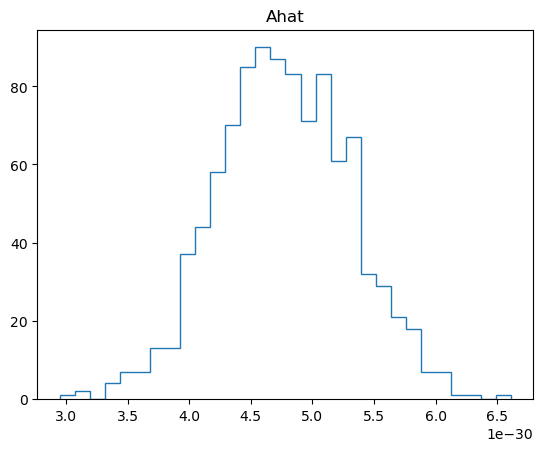

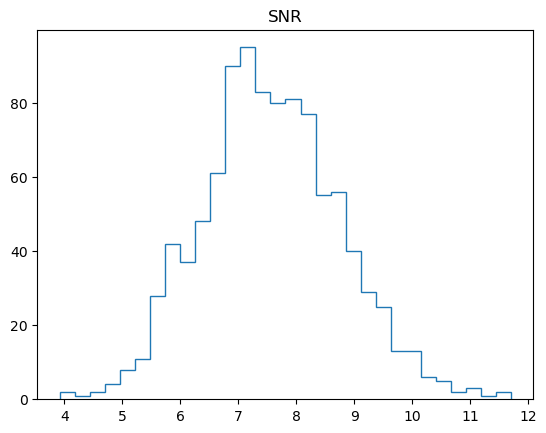

In [44]:
plt.hist(ahat,bins=30,histtype='step')
plt.title("Ahat")
plt.show()

plt.hist(snr,bins=30,histtype='step')
plt.title("SNR")
plt.show()

In [28]:
np.save("/Users/kalistaw/Desktop/OS_2023_data/ng_epta_ppta_snr_orf_zero_tspan_ppta_fx_gamma_dmgp_set.npy",snr)
np.save("/Users/kalistaw/Desktop/OS_2023_data/ng_epta_ppta_rho_orf_zero_tspan_ppta_fx_gamma_dmgp_set.npy",rho)
np.save("/Users/kalistaw/Desktop/OS_2023_data/ng_epta_ppta_sig_orf_zero_tspan_ppta_fx_gamma_dmgp_set.npy",sig)

In [34]:
#Noise weighted average across rhos

In [2]:
rho=np.load("/Users/kalistaw/Desktop/OS_2023_data/ng_epta_ppta_rho_orf_zero_vg_tspan_ppta_var_gamma_2_ppta_ng.npy")
sig=np.load("/Users/kalistaw/Desktop/OS_2023_data/ng_epta_ppta_sig_orf_zero_vg_tspan_ppta_var_gamma_2_ppta_ng.npy")

In [3]:
itter=np.arange(0,len(rho[0]))

In [4]:
weighted_rho=[]
sig_ave=[]
for k in itter:
    rho_val=0
    rho_norm=0
    sig_val=0
    sig_norm=0
    sig_final=0
    
    for i,j in zip(rho,sig):
        rho_val+=i[k]/((j[k])**2)
        
        rho_norm+=1/((j[k])**2)
        
        
        sig_val+=1/(j[k]**2)
        
        sig_norm+=1/(j[k])**4
    
    rho_final=(1/rho_norm)*rho_val
    sig_final=(1/sig_norm)*sig_val
    sig_final=np.sqrt(sig_final)
    weighted_rho.append(rho_final)
    sig_ave.append(sig_final)

In [5]:
weighted_rho

[162.40199529437825,
 386.97162590675697,
 -304.2445095689519,
 350.2796394989987,
 557.4968600365949,
 212.32261361392023,
 808.1097000842963,
 80.20505523328401,
 356.22089457112054,
 548.1594256251977,
 -238.5795957681968,
 -10.939010495077685,
 371.44423867612073,
 357.8542720401198,
 4687.69230179048,
 56.7666274881133,
 -35.781379960250256,
 276.93075725213527,
 -760.8417585355891,
 216.86667353956204,
 -53.209412054444684,
 -2324.7609876184947,
 2753.9893308883547,
 536.2039155219006,
 245.60669107837722,
 534.4680896838915,
 124.76910384029084,
 2942.666199490383,
 -1689.27232483966,
 528.2484944836164,
 -159.2004391480996,
 -2115.8716327329194,
 -170.62066110982684,
 -1151.9397701306261,
 6200.476656233931,
 4808.977206625059,
 -1897.4826220845653,
 774.5915768015012,
 -156.41614285812148,
 -5598.758375333968,
 999.8062251470028,
 1068.862116388769,
 -9201.695237435539,
 193.17383235602267,
 293.115733055102,
 7536.358379456158,
 -605.7234238091203,
 2716.0612959488253,
 171.2

In [6]:
sig_ave

[221.36394376989816,
 139.58701048210276,
 242.84913705816928,
 1141.6565733025816,
 350.98463038418487,
 311.5179436395481,
 435.01084452205276,
 403.4178704508864,
 885.1717817787347,
 173.12540170578336,
 466.0871532650141,
 218.26322889056522,
 206.44310943917966,
 299.94335744949655,
 1451.7068943274924,
 148.70018570820912,
 332.38281328267493,
 233.09505890701027,
 567.4316734732441,
 370.6300182968412,
 117.37004156787253,
 884.8918948272132,
 881.8602045782899,
 457.9992195715002,
 308.0029565982983,
 502.06953139736567,
 314.8817521811183,
 1014.9595715980421,
 1187.2528601718502,
 390.7308110170277,
 185.01235747466058,
 714.0666897619976,
 559.0198255199015,
 395.8042083109179,
 5527.380935866772,
 1384.7774054870588,
 2808.030034189123,
 2940.7292912687753,
 266.53330221981196,
 4997.481946666863,
 350.0586233114544,
 305.800540416073,
 2761.405328731975,
 254.3961271589749,
 400.67484880752477,
 3917.6862397049686,
 668.0735965449134,
 2673.7080055621223,
 535.18346091804

In [7]:
print(len(weighted_rho),len(sig_ave))

4465 4465


In [8]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/ppta/psrs_ppta_dr3.pkl','rb') as fin:
    ppta_psrs1=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/ng15_nodmx.pkl','rb') as fin:
    ng_psrs=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/epta/dr2new/psrs_epta_dr2new.pkl','rb') as fin:
    epta_psrs=pickle.load(fin)

In [9]:
for p in ppta_psrs1:
    p.name=p.name+'_ppta'
ppta_psrs=[]
for p in ppta_psrs1: 
    if p.name == 'J2241-5236_ppta':
        pass
    elif p.name=='J1824-2452A_ppta':
        pass
    else:
        ppta_psrs.append(p)
for p in ng_psrs:
    p.name=p.name+'_nano'
for p in epta_psrs:
    p.name=p.name+'_epta'

In [10]:
psrs_corr=[]
psrs_corr.extend(ppta_psrs)
psrs_corr.extend(ng_psrs)
#psrs_corr.extend(epta_psrs)

In [11]:
psrs_corr_pairs=[]
npsr = len(psrs_corr)
for ii in range(npsr):
    for jj in range(ii+1, npsr):
        print(psrs_corr[ii].name, psrs_corr[jj].name)
        psrs_corr_pairs.append(psrs_corr[ii].name + " "+ psrs_corr[jj].name)

J0030+0451_ppta J0125-2327_ppta
J0030+0451_ppta J0437-4715_ppta
J0030+0451_ppta J0613-0200_ppta
J0030+0451_ppta J0614-3329_ppta
J0030+0451_ppta J0711-6830_ppta
J0030+0451_ppta J1017-7156_ppta
J0030+0451_ppta J1022+1001_ppta
J0030+0451_ppta J1024-0719_ppta
J0030+0451_ppta J1045-4509_ppta
J0030+0451_ppta J1125-6014_ppta
J0030+0451_ppta J1446-4701_ppta
J0030+0451_ppta J1545-4550_ppta
J0030+0451_ppta J1600-3053_ppta
J0030+0451_ppta J1603-7202_ppta
J0030+0451_ppta J1643-1224_ppta
J0030+0451_ppta J1713+0747_ppta
J0030+0451_ppta J1730-2304_ppta
J0030+0451_ppta J1744-1134_ppta
J0030+0451_ppta J1832-0836_ppta
J0030+0451_ppta J1857+0943_ppta
J0030+0451_ppta J1909-3744_ppta
J0030+0451_ppta J1933-6211_ppta
J0030+0451_ppta J1939+2134_ppta
J0030+0451_ppta J2124-3358_ppta
J0030+0451_ppta J2129-5721_ppta
J0030+0451_ppta J2145-0750_ppta
J0030+0451_ppta B1855+09_nano
J0030+0451_ppta B1937+21_nano
J0030+0451_ppta B1953+29_nano
J0030+0451_ppta J0023+0923_nano
J0030+0451_ppta J0030+0451_nano
J0030+0451_ppt

In [12]:
number_corr=len(psrs_corr_pairs)
same_pulsar_idx=[]
for i in range(number_corr):
    if psrs_corr_pairs[i][0:10]==psrs_corr_pairs[i][16:26]:
        print(psrs_corr_pairs[i][0:10],psrs_corr_pairs[i][16:26])
        same_pulsar_idx.append(i)
        print(i)

J0030+0451 J0030+0451
30
J0437-4715 J0437-4715
218
J0613-0200 J0613-0200
314
J0614-3329 J0614-3329
405
J1022+1001 J1022+1001
677
J1024-0719 J1024-0719
764
J1600-3053 J1600-3053
1184
J1643-1224 J1643-1224
1347
J1713+0747 J1713+0747
1427
J1730-2304 J1730-2304
1506
J1744-1134 J1744-1134
1585
J1832-0836 J1832-0836
1666
J1909-3744 J1909-3744
1817
J2124-3358 J2124-3358
2041
J2145-0750 J2145-0750
2179


In [13]:
weighted_rho=np.array(weighted_rho)
sig_ave=np.array(sig_ave)

In [14]:
coeff_repeated_pulsar=weighted_rho[same_pulsar_idx]
coeff_error_repeated_pulsar=sig_ave[same_pulsar_idx]

In [15]:
repeated_pulsar_name=[]
for i in same_pulsar_idx:
    name=psrs_corr_pairs[i]
    repeated_pulsar_name.append(name)

In [16]:
rho_sigma=np.stack((coeff_repeated_pulsar,coeff_error_repeated_pulsar),axis=1)

In [17]:
dictionary_of_coeff = dict(zip(repeated_pulsar_name, rho_sigma))

In [18]:
dictionary_of_coeff

{'J0030+0451_ppta J0030+0451_nano': array([-159.20043915,  185.01235747]),
 'J0437-4715_ppta J0437-4715_nano': array([-1.24503366,  3.24413009]),
 'J0613-0200_ppta J0613-0200_nano': array([2.68646205, 0.71209151]),
 'J0614-3329_ppta J0614-3329_nano': array([-130.17525806,  962.14520563]),
 'J1022+1001_ppta J1022+1001_nano': array([-8.69851627, 27.19203458]),
 'J1024-0719_ppta J1024-0719_nano': array([-0.66584204,  2.67436286]),
 'J1600-3053_ppta J1600-3053_nano': array([0.40372745, 0.62337372]),
 'J1643-1224_ppta J1643-1224_nano': array([1.27042731, 7.5886145 ]),
 'J1713+0747_ppta J1713+0747_nano': array([0.06698039, 0.38125296]),
 'J1730-2304_ppta J1730-2304_nano': array([45.57162408, 46.48197612]),
 'J1744-1134_ppta J1744-1134_nano': array([0.10996254, 0.54427939]),
 'J1832-0836_ppta J1832-0836_nano': array([5.39565952, 4.62244083]),
 'J1909-3744_ppta J1909-3744_nano': array([0.59894358, 0.42648292]),
 'J2124-3358_ppta J2124-3358_nano': array([ 4.6319682, 28.2427277]),
 'J2145-0750_p

In [19]:
import pickle
# create a binary pickle file 
f = open("/Users/kalistaw/Desktop/OS_2023_data/same_pulsar_rho_sig_tspan_ppta_weighted_avg_var_gamma_2_ppta_ng.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(dictionary_of_coeff,f)

# close file
f.close()

In [ ]:
#Get rho for value nearest to median SNR

In [31]:
np.median(snr)

7.352721927457062

In [32]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [33]:
find_nearest(snr,np.median(snr))

405

In [34]:
closest_run_median_rho=rho[find_nearest(snr,np.median(snr))]

In [35]:
closest_run_median_rho.shape

(7140,)

In [36]:
closest_run_median_sig=sig[find_nearest(snr,np.median(snr))]

In [37]:
closest_run_median_sig.shape

(7140,)

In [38]:
type(closest_run_median_sig)

numpy.ndarray

In [39]:
np.std(closest_run_median_sig)

1008.3139134436452

In [40]:
np.mean(closest_run_median_rho)

-0.3518433893609529

In [41]:
np.max(closest_run_median_sig)

52043.987591125704

In [42]:
np.min(closest_run_median_sig)

0.3556127874875999

In [38]:
#rho: correlation coefficient for each pulsar pair
#sig error on correlation coefficient for each pulsar pair

In [39]:
with open ('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/ppta/psrs_ppta_dr3.pkl','rb') as fin:
    ppta_psrs1=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/ng15_nodmx.pkl','rb') as fin:
    ng_psrs=pickle.load(fin)
with open('/Users/kalistaw/Desktop/OS_2023_data/NG_3P_comparison/epta/dr2new/psrs_epta_dr2new.pkl','rb') as fin:
    epta_psrs=pickle.load(fin)

In [40]:
for p in ppta_psrs1:
    p.name=p.name+'_ppta'
ppta_psrs=[]
for p in ppta_psrs1: 
    if p.name == 'J2241-5236_ppta':
        pass
    elif p.name=='J1824-2452A_ppta':
        pass
    else:
        ppta_psrs.append(p)
for p in ng_psrs:
    p.name=p.name+'_nano'
for p in epta_psrs:
    p.name=p.name+'_epta'

In [41]:
psrs_corr=[]
psrs_corr.extend(ppta_psrs)
psrs_corr.extend(ng_psrs)
psrs_corr.extend(epta_psrs)

In [42]:
psrs_corr_pairs=[]
npsr = len(psrs_corr)
for ii in range(npsr):
    for jj in range(ii+1, npsr):
        print(psrs_corr[ii].name, psrs_corr[jj].name)
        psrs_corr_pairs.append(psrs_corr[ii].name + " "+ psrs_corr[jj].name)

J0030+0451_ppta J0125-2327_ppta
J0030+0451_ppta J0437-4715_ppta
J0030+0451_ppta J0613-0200_ppta
J0030+0451_ppta J0614-3329_ppta
J0030+0451_ppta J0711-6830_ppta
J0030+0451_ppta J1017-7156_ppta
J0030+0451_ppta J1022+1001_ppta
J0030+0451_ppta J1024-0719_ppta
J0030+0451_ppta J1045-4509_ppta
J0030+0451_ppta J1125-6014_ppta
J0030+0451_ppta J1446-4701_ppta
J0030+0451_ppta J1545-4550_ppta
J0030+0451_ppta J1600-3053_ppta
J0030+0451_ppta J1603-7202_ppta
J0030+0451_ppta J1643-1224_ppta
J0030+0451_ppta J1713+0747_ppta
J0030+0451_ppta J1730-2304_ppta
J0030+0451_ppta J1744-1134_ppta
J0030+0451_ppta J1832-0836_ppta
J0030+0451_ppta J1857+0943_ppta
J0030+0451_ppta J1909-3744_ppta
J0030+0451_ppta J1933-6211_ppta
J0030+0451_ppta J1939+2134_ppta
J0030+0451_ppta J2124-3358_ppta
J0030+0451_ppta J2129-5721_ppta
J0030+0451_ppta J2145-0750_ppta
J0030+0451_ppta B1855+09_nano
J0030+0451_ppta B1937+21_nano
J0030+0451_ppta B1953+29_nano
J0030+0451_ppta J0023+0923_nano
J0030+0451_ppta J0030+0451_nano
J0030+0451_ppt

In [43]:
len(psrs_corr_pairs)

7140

In [44]:
number_corr=len(psrs_corr_pairs)
same_pulsar_idx=[]
for i in range(number_corr):
    if psrs_corr_pairs[i][0:10]==psrs_corr_pairs[i][16:26]:
        print(psrs_corr_pairs[i][0:10],psrs_corr_pairs[i][16:26])
        same_pulsar_idx.append(i)
        print(i)

J0030+0451 J0030+0451
30
J0030+0451 J0030+0451
94
J0437-4715 J0437-4715
268
J0613-0200 J0613-0200
389
J0613-0200 J0613-0200
446
J0614-3329 J0614-3329
505
J1022+1001 J1022+1001
852
J1022+1001 J1022+1001
904
J1024-0719 J1024-0719
964
J1024-0719 J1024-0719
1016
J1600-3053 J1600-3053
1509
J1600-3053 J1600-3053
1558
J1643-1224 J1643-1224
1722
J1713+0747 J1713+0747
1827
J1713+0747 J1713+0747
1872
J1730-2304 J1730-2304
1931
J1730-2304 J1730-2304
1975
J1744-1134 J1744-1134
2035
J1744-1134 J1744-1134
2078
J1832-0836 J1832-0836
2141
J1857+0943 J1857+0943
2282
J1909-3744 J1909-3744
2342
J1909-3744 J1909-3744
2381
J2124-3358 J2124-3358
2641
J2124-3358 J2124-3358
2673
J2145-0750 J2145-0750
2829
J0030+0451 J0030+0451
3287
J0613-0200 J0613-0200
3956
J1012+5307 J1012+5307
4563
J1022+1001 J1022+1001
4635
J1024-0719 J1024-0719
4706
J1455-3330 J1455-3330
4977
J1600-3053 J1600-3053
5043
J1640+2224 J1640+2224
5233
J1713+0747 J1713+0747
5414
J1730-2304 J1730-2304
5530
J1738+0333 J1738+0333
5587
J1744-1134 J

In [45]:
coeff_repeated_pulsar=closest_run_median_rho[same_pulsar_idx]
coeff_error_repeated_pulsar=closest_run_median_sig[same_pulsar_idx]

In [46]:
repeated_pulsar_name=[]
for i in same_pulsar_idx:
    name=psrs_corr_pairs[i]
    repeated_pulsar_name.append(name)

In [47]:
rho_sigma=np.stack((coeff_repeated_pulsar,coeff_error_repeated_pulsar),axis=1)

In [48]:
dictionary_of_coeff = dict(zip(repeated_pulsar_name, rho_sigma))

In [49]:
dictionary_of_coeff

{'J0030+0451_ppta J0030+0451_nano': array([-167.39098484,  195.32416079]),
 'J0030+0451_ppta J0030+0451_epta': array([-70.01887858, 136.89115329]),
 'J0437-4715_ppta J0437-4715_nano': array([-34.00292974, 117.81840022]),
 'J0613-0200_ppta J0613-0200_nano': array([1.83041652, 1.13142496]),
 'J0613-0200_ppta J0613-0200_epta': array([-0.134548  ,  0.88769455]),
 'J0614-3329_ppta J0614-3329_nano': array([ 581.10771188, 5087.32054043]),
 'J1022+1001_ppta J1022+1001_nano': array([-2.74170374, 22.13331046]),
 'J1022+1001_ppta J1022+1001_epta': array([1.57349063, 1.42432597]),
 'J1024-0719_ppta J1024-0719_nano': array([-0.63932001,  2.53295507]),
 'J1024-0719_ppta J1024-0719_epta': array([-0.0934278 ,  4.75435227]),
 'J1600-3053_ppta J1600-3053_nano': array([0.51316886, 0.64566709]),
 'J1600-3053_ppta J1600-3053_epta': array([-0.20032883,  0.88403564]),
 'J1643-1224_ppta J1643-1224_nano': array([ 1.65347343, 13.64972149]),
 'J1713+0747_ppta J1713+0747_nano': array([0.10157412, 0.37081431]),
 '

In [50]:
import pickle
# create a binary pickle file 
f = open("/Users/kalistaw/Desktop/OS_2023_data/same_pulsar_rho_sig_tspan_ppta.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(dictionary_of_coeff,f)

# close file
f.close()

In [23]:
psr_name=[]
for p in psrs:
    psr=p.name[:10]
    psr_name.append(psr)

psr_repeat=[]
for n,p in zip(psr_name,psrs):
    if psr_name.count(n)>1:
        psr_repeat.append(p)

for p in psr_repeat:
    print(p.name)

for p,i in zip(psr_repeat,enumerate(psr_repeat)):
    if 'J0030+0451'in p.name:
        print(p.name,i)

print(psrs[0].pos)
print(psrs[16].pos)
print(psrs[41].pos)

model_orfs.param_hd_orf(psrs[0].pos,psrs[41].pos)